In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

#**Data Cleaning**

In [ ]:
df_raw = pd.read_csv('/content/clean_kaggle_data_2020.csv')

In [ ]:
df_raw.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...

In [ ]:
#excluding questions from our dataset 
df_raw.drop(df_raw.index[0],inplace=True)

In [ ]:
df = df_raw.copy()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

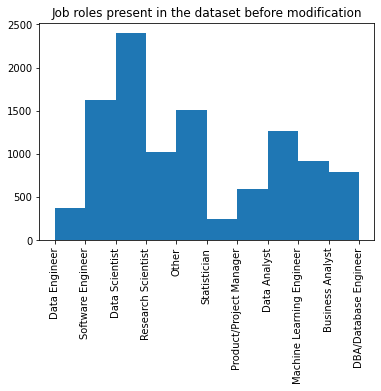

In [ ]:
#plot to verify data science related job roles
plt.hist(df_raw['Q5'])
plt.title('Job roles present in the dataset before modification')
plt.xticks(rotation = '90')

In [ ]:
#modifying our dataset by excluding job roles that are not related to data science
data_jobs = ('Data Scientist','Machine Learning Engineer','Data Engineer','Data Analyst','Business Analyst','DBA/Database Engineer')
df_raw= df_raw[df_raw['Q5'].isin(data_jobs)]
df_raw.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,999"
4,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,PyCharm,NaN,NaN,Sublime Text,Vim / Emacs,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999"
6,378,30-34,Man,Canada,Bachelor’s degree,Data Engineer,< 1 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,"90,000-99,999"
9,874,30-34,Man,Russia,Bachelor’s degree,Data Scientist,< 1 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,PyCharm,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,Binder / JupyterHub,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5735 entries, 1 to 10729
Columns: 357 entries, Time from Start to Finish (seconds) to Q24_buckets
dtypes: float64(1), object(356)
memory usage: 15.7+ MB


In [ ]:
df_raw.isnull().sum()

Time from Start to Finish (seconds)       0
Q1                                        0
Q2                                        0
Q3                                        0
Q4                                        0
                                       ... 
Q35_B_Part_9                           5620
Q35_B_Part_10                          4970
Q35_B_OTHER                            5672
Q24_Encoded                               0
Q24_buckets                               0
Length: 357, dtype: int64

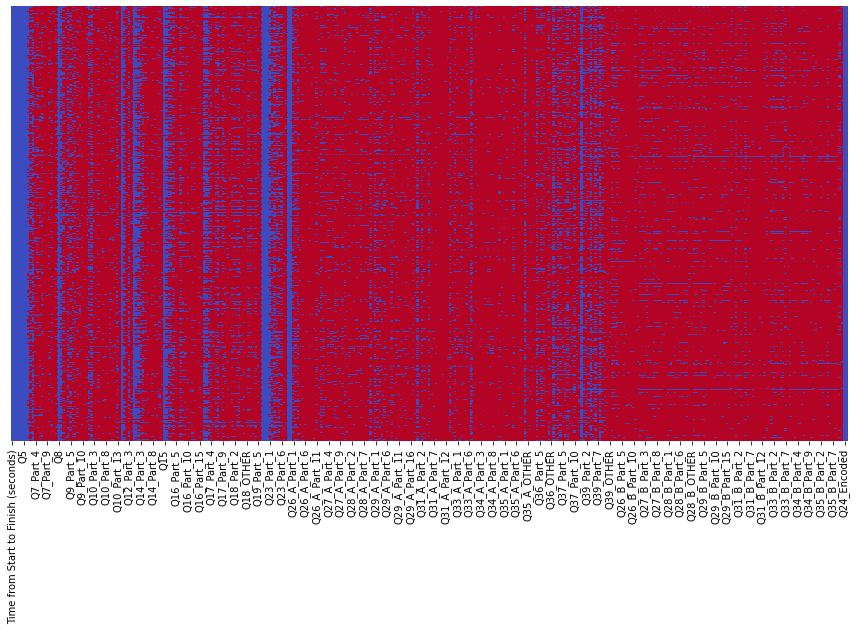

In [ ]:
#heatmap to check visualize null values
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df_raw.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)


The heatmap plot for visualizing the null values in our dataset shows that we have a lot of null values in most of the features in our dataset. Since, we have a fairly large dataset, we can drop the columns which have alot of null values.

In [ ]:
#dropping all columns that has more than 1000 null values
for i in df_raw.columns:
  if df_raw[i].isnull().sum()>1000:
    df_raw.drop(i,axis=1,inplace=True)
  else:
    pass    

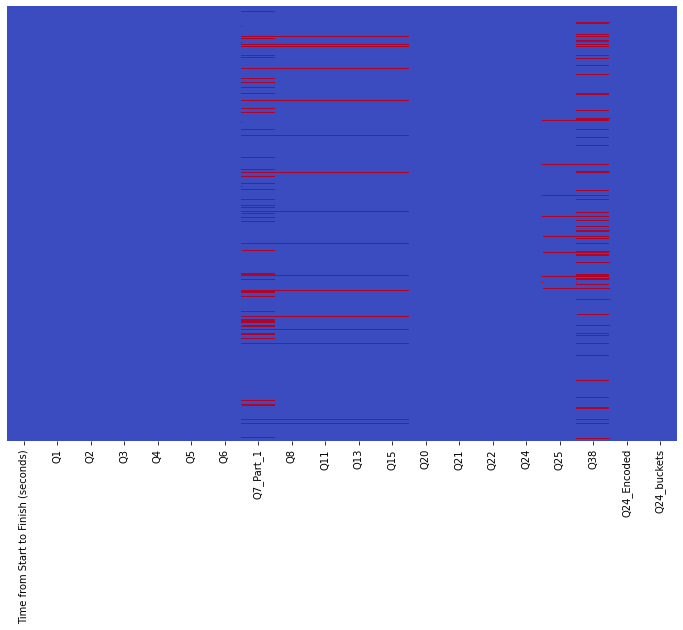

In [ ]:
#visualizing changes in dataset after dropping columns containing more than 1000 null values
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_raw.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [ ]:
#converting time column to numeric
df_raw["Time from Start to Finish (seconds)"] = pd.to_numeric(df_raw["Time from Start to Finish (seconds)"])
df_raw.rename(columns={"Time from Start to Finish (seconds)":"Time"},inplace=True)

Text(0, 0.5, 'Salary')

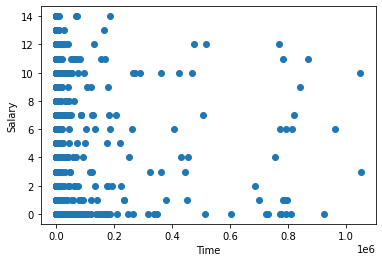

In [ ]:
#plot to check relationship of time column with target variable
plt.scatter(df_raw['Time'],df_raw['Q24_Encoded'])
plt.xlabel('Time')
plt.ylabel('Salary')

In [ ]:
#dropping Time column as the plot shows no significant relation with the target variable
df_raw.drop('Time',axis=1,inplace=True)

**Q8 COLUMN**

In [ ]:
df_raw['Q8'].value_counts().head()

Python    4328
SQL        444
R          429
C++         57
C           55
Name: Q8, dtype: int64

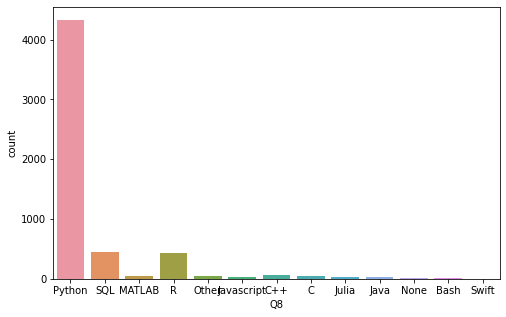

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_raw['Q8'])
plt.show()

**LOOKING AT Q7_PART_1 COLUMN**

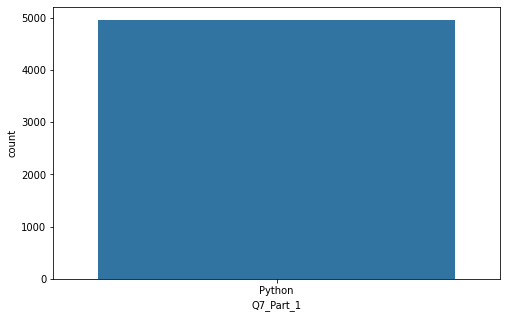

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_raw['Q7_Part_1'])
plt.show()

**Column Q13**

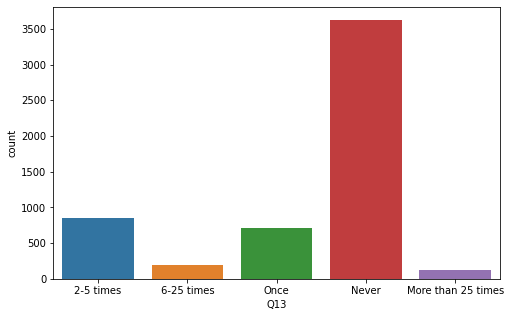

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_raw['Q13'])
plt.show()

In [ ]:
df_raw.drop('Q7_Part_1',axis=1,inplace=True)
df_raw.drop('Q8',axis=1,inplace=True)
df_raw.drop('Q13',axis=1,inplace=True)

**Since the columns Q7_Part_1, Q8 and Q13 contain the same values respectively, it can cause difficulty for our model to differentiate between the labels. It will in turn have a negative effect on our model and might lead to high bias in the data.**



Now we will replace the Nan values with the mode of the feature column.

In [ ]:
df_raw['Q38'].value_counts()

Local development environments (RStudio, JupyterLab, etc.)              2589
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       1152
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)     471
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                 363
Advanced statistical software (SPSS, SAS, etc.)                          323
Other                                                                    226
Name: Q38, dtype: int64

In [ ]:
df_raw.at[df_raw.Q38.isnull(), 'Q38'] = 'Local development environments (RStudio, JupyterLab, etc.)'

In [ ]:

df_raw['Q11'].value_counts()

A personal computer or laptop                                          3948
A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)    1103
A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)               336
Other                                                                    80
None                                                                     41
Name: Q11, dtype: int64

In [ ]:
df_raw.at[df_raw.Q11.isnull(), 'Q11'] = 'A personal computer or laptop'
df_raw[df_raw['Q11'].isnull()].head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q11,Q15,Q20,Q21,Q22,Q24,Q25,Q38,Q24_Encoded,Q24_buckets


In [ ]:
df_raw['Q15'].value_counts()

Under 1 year                             1444
1-2 years                                1301
2-3 years                                 755
3-4 years                                 504
5-10 years                                457
4-5 years                                 433
I do not use machine learning methods     419
10-20 years                               130
20 or more years                           65
Name: Q15, dtype: int64

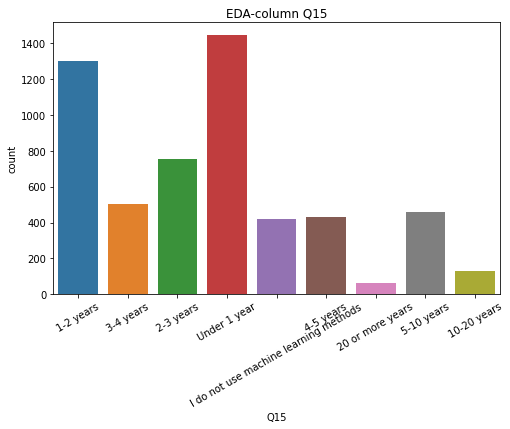

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_raw['Q15'])
plt.title('EDA-column Q15')
plt.xticks(rotation=30)
plt.show()

In [ ]:
df_raw.at[df_raw.Q15.isnull(), 'Q15'] = '1 year'

Since values : under 1 year and 1-2 year have almost same values we replace the nan values with their mean i.e 1 year

In [ ]:
df_raw['Q25'].value_counts()

$0 ($USD)                  1806
$1000-$9,999               1077
$100-$999                   953
$10,000-$99,999             694
$1-$99                      653
$100,000 or more ($USD)     472
Name: Q25, dtype: int64

In [ ]:
df_raw.at[df_raw.Q25.isnull(), 'Q25'] = '$0 ($USD)'
df_raw[df_raw['Q25'].isnull()].head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q11,Q15,Q20,Q21,Q22,Q24,Q25,Q38,Q24_Encoded,Q24_buckets


In [ ]:
#dropping Q24 and Q24_buckets column since we already have Q24_encoded for further analysis
df_raw.drop(['Q24','Q24_buckets'],axis=1,inplace=True)

# Encoding 
**One hot encoding**

In order to convert the categorical variables we will use one hot encoding and label encoding based upon the nature of the features. We one hot encode the features whose values are multiple type questions and do not hold any significance with respect to the information that the value conveys. Accordingly we will one hot encode  ['Q2','Q3','Q11','Q15','Q22','Q38'] columns

In [ ]:
mul = ['Q2','Q3','Q11','Q15','Q22','Q38']
df_mul = pd.get_dummies(df_raw[mul])

**ORDINAL ENCODING**

In [ ]:
Q1_encode={'30-34':3, '35-39':4, '25-29':2, '22-24':1, '18-21':0, '55-59':8, '50-54':7,
       '45-49':6, '40-44':5, '60-69':9, '70+':10}

In [ ]:
df_raw.loc[1:,'Q1_Encoded'] = df_raw.loc[1:,'Q1'].map(Q1_encode)
df_raw.Q1_Encoded.unique()

array([ 3,  4,  2,  1,  0,  8,  7,  6,  5,  9, 10])

In [ ]:
Q4_encode = {'Master’s degree':5, 'Doctoral degree':6, 'Bachelor’s degree':4,
       'Some college/university study without earning a bachelor’s degree':2,
       'Professional degree':3, 'I prefer not to answer':1,
       'No formal education past high school':0}


In [ ]:
df_raw.loc[1:,'Q4_Encoded'] = df_raw.loc[1:,'Q4'].map(Q4_encode)
df_raw.Q4_Encoded.unique()

array([5, 6, 4, 2, 3, 1, 0])

In [ ]:
Q5_encode = {'Data Engineer':4, 'Data Scientist':5, 'Data Analyst':2,
       'Machine Learning Engineer':3, 'Business Analyst':1,
       'DBA/Database Engineer':0}
df_raw.loc[1:,'Q5_Encoded'] = df_raw.loc[1:,'Q5'].map(Q5_encode)
df_raw.Q5_Encoded.unique()

array([4, 5, 2, 3, 1, 0])

In [ ]:
Q6_encode = {'5-10 years':4, '< 1 years':1, '3-5 years':3, '10-20 years':4, '1-2 years':2,
       '20+ years':5, 'I have never written code':0}
df_raw.loc[1:,'Q6_Encoded'] = df_raw.loc[1:,'Q6'].map(Q6_encode)
df_raw.Q6_Encoded.unique()

array([4, 1, 3, 2, 5, 0])

In [ ]:

Q20_encode = {'10,000 or more employees':4, '250-999 employees':2,
       '1000-9,999 employees':3, '0-49 employees':0, '50-249 employees':1}
df_raw.loc[1:,'Q20_Encoded'] = df_raw.loc[1:,'Q20'].map(Q20_encode)
df_raw.loc[1:,'Q20_Encoded']= df_raw.loc[1:,'Q20_Encoded'].astype(int)
df_raw.Q20_Encoded.unique()


array([4, 2, 3, 0, 1])

In [ ]:

Q21_encode = {'20+':6, '5-9':3, '3-4':2, '1-2':1, '0':0, '10-14':4, '15-19':5}
df_raw.loc[1:,'Q21_Encoded'] = df_raw.loc[1:,'Q21'].map(Q21_encode)
df_raw.loc[1:,'Q21_Encoded']= df_raw.loc[1:,'Q21_Encoded'].astype(int)
df_raw.Q21_Encoded.unique()

array([6, 3, 2, 1, 0, 4, 5])

In [ ]:
Q25_encode = {'$100,000 or more ($USD)':5, '$10,000-$99,999':4, '$1000-$9,999':3,
       '$0 ($USD)':0, '$1-$99':1, '$100-$999':2}
df_raw.loc[1:,'Q25_Encoded'] = df_raw.loc[1:,'Q25'].map(Q25_encode)
df_raw.loc[1:,'Q25_Encoded']= df_raw.loc[1:,'Q25_Encoded'].astype(int)
df_raw.Q25_Encoded.unique()

array([5, 4, 3, 0, 1, 2])

In [ ]:
#dropping all other columns 
df_raw.drop(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q11', 'Q15', 'Q20', 'Q21', 'Q22',
       'Q25','Q38'],axis=1,inplace=True)

In [ ]:
#combining one hot and label encoded features 
df_final = pd.concat([df_raw,df_mul], axis=1)

In [ ]:
#Clean dataset: does not contain null values or categorical features
df_final.head()

,Q24_Encoded,Q1_Encoded,Q4_Encoded,Q5_Encoded,Q6_Encoded,Q20_Encoded,Q21_Encoded,Q25_Encoded,Q2_Man,Q2_Nonbinary,Q2_Prefer not to say,Q2_Prefer to self-describe,Q2_Woman,Q3_Argentina,Q3_Australia,Q3_Bangladesh,Q3_Belarus,Q3_Belgium,Q3_Brazil,Q3_Canada,Q3_Chile,Q3_China,Q3_Colombia,Q3_Egypt,Q3_France,Q3_Germany,Q3_Ghana,Q3_Greece,Q3_India,Q3_Indonesia,"Q3_Iran, Islamic Republic of...",Q3_Ireland,Q3_Israel,Q3_Italy,Q3_Japan,Q3_Kenya,Q3_Malaysia,Q3_Mexico,Q3_Morocco,Q3_Nepal,...,Q3_Spain,Q3_Sri Lanka,Q3_Sweden,Q3_Switzerland,Q3_Taiwan,Q3_Thailand,Q3_Tunisia,Q3_Turkey,Q3_Ukraine,Q3_United Arab Emirates,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_United States of America,Q3_Viet Nam,"Q11_A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)","Q11_A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)",Q11_A personal computer or laptop,Q11_None,Q11_Other,Q15_1 year,Q15_1-2 years,Q15_10-20 years,Q15_2-3 years,Q15_20 or more years,Q15_3-4 years,Q15_4-5 years,Q15_5-10 years,Q15_I do not use machine learning methods,Q15_Under 1 year,Q22_I do not know,Q22_No (we do not use ML methods),Q22_We are exploring ML methods (and may one day put a model into production),"Q22_We have well established ML methods (i.e., models in production for more than 2 years)","Q22_We recently started using ML methods (i.e., models in production for less than 2 years)",Q22_We use ML methods for generating insights (but do not put working models into production),"Q38_Advanced statistical software (SPSS, SAS, etc.)","Q38_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q38_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q38_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q38_Local development environments (RStudio, JupyterLab, etc.)",Q38_Other
1,10.0,3,5,4,4,4,6,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,11.0,3,5,5,4,2,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,7.0,4,6,5,4,3,6,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
6,9.0,3,4,4,1,0,2,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
9,0.0,3,4,5,1,1,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0


#**Exploratory data analysis and feature selection:**

Text(0, 0.5, 'count')

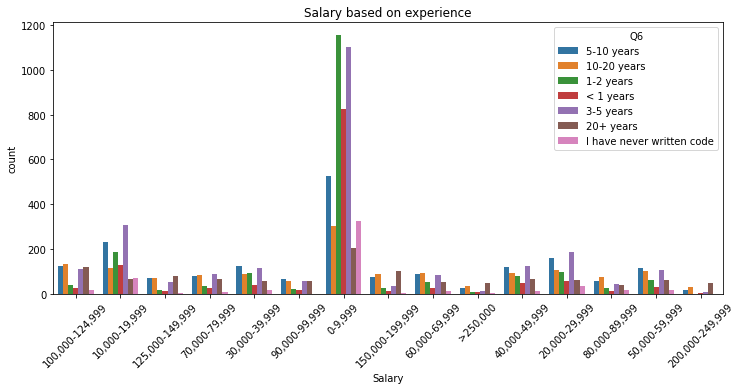

In [ ]:
plt.figure(figsize = (12,5))
ax = sns.countplot(x=df["Q24_buckets"], hue=df["Q6"], data=df)
ax.set_title('Salary based on experience')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set_xlabel('Salary')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

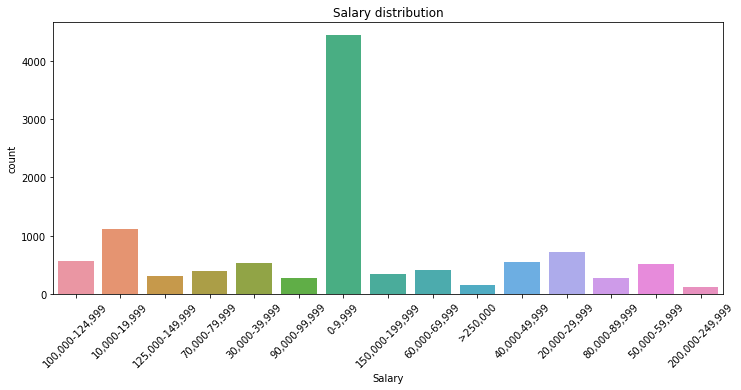

In [ ]:
plt.figure(figsize = (12,5))
ax = sns.countplot(x=df["Q24_buckets"], data=df)
ax.set_title('Salary distribution')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set_xlabel('Salary')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

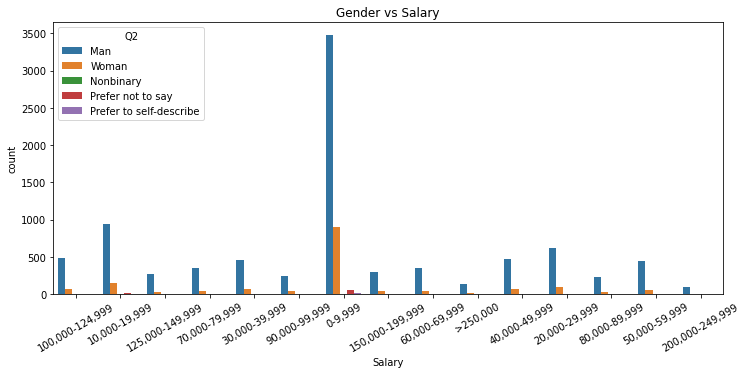

In [ ]:
plt.figure(figsize = (12,5))
ax = sns.countplot(data = df , x = df['Q24_buckets'],hue = df['Q2'])
ax.set_title('Gender vs Salary')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_xlabel('Salary')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

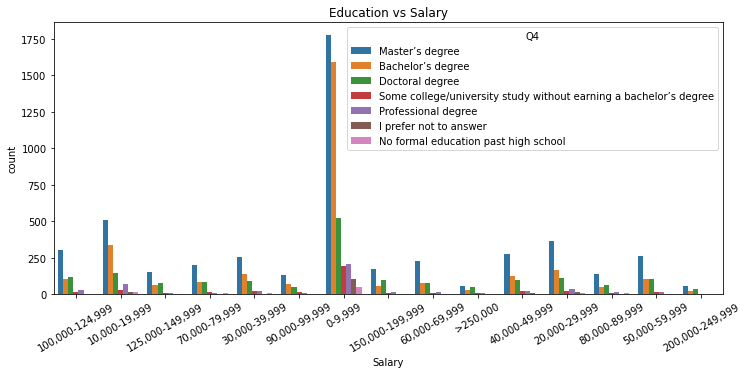

In [ ]:
plt.figure(figsize = (12,5))
ax = sns.countplot(data = df , x = df['Q24_buckets'],hue = df['Q4'])
ax.set_title('Education vs Salary')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_xlabel('Salary')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

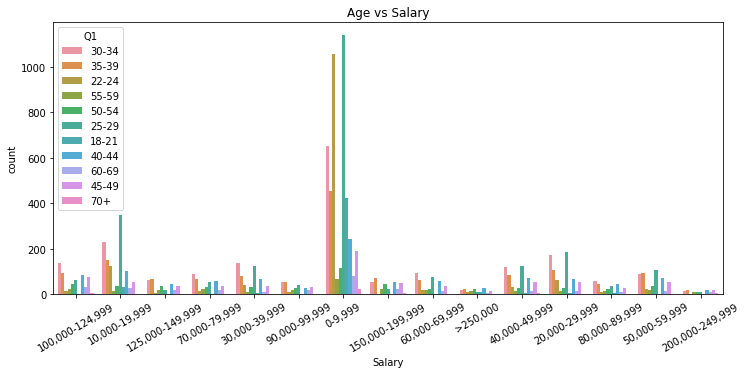

In [ ]:
plt.figure(figsize = (12,5))
ax = sns.countplot(data = df , x = df['Q24_buckets'],hue = df['Q1'])
ax.set_title('Age vs Salary')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_xlabel('Salary')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

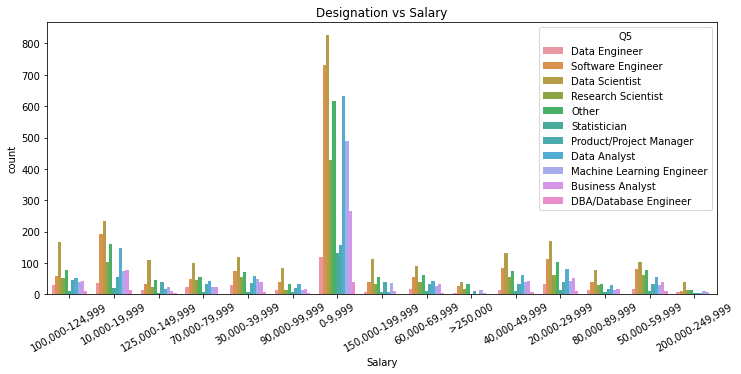

In [ ]:
plt.figure(figsize = (12,5))
ax = sns.countplot(data = df , x = df['Q24_buckets'],hue = df['Q5'])
ax.set_title('Designation vs Salary')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_xlabel('Salary')
ax.set_ylabel('count')

#**Feature selection**

In [ ]:
#Defining target feature
x = df_final.iloc[:,1:]
y = df_final.iloc[:,0]

In [ ]:
#Splitting model into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [ ]:
# Using chi-square feature selection since all our features are categorical
chi = SelectKBest(score_func=chi2, k=10)
chi.fit(x_train, y_train)
x_train_chi = chi.transform(x_train)
x_test_chi = chi.transform(x_test)

In [ ]:
#list of selected features
features_select = x_test.columns[(chi.get_support())]
features_select

Index(['Q1_Encoded', 'Q6_Encoded', 'Q20_Encoded', 'Q21_Encoded', 'Q25_Encoded',
       'Q3_India', 'Q3_United States of America', 'Q15_5-10 years',
       'Q22_I do not know',
       'Q22_We have well established ML methods (i.e., models in production for more than 2 years)'],
      dtype='object')

In [ ]:
#converting selected features from chi-square to dataframe for further analysis
x_train_chi = pd.DataFrame(x_train_chi)
x_test_chi = pd.DataFrame(x_test_chi)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

#**MODEL IMPLEMENTATION WITH 10 FOLD CROSS-VALIDATION**

In [ ]:
#function to implement ordinal logistic regression
def ord_regressor(proba_set,train_set,new_y,old_y,model):
  probabilty = np.zeros((len(proba_set),14))
  for i in range(0,14):
    new_y[old_y <=i] = 0
    new_y[old_y >i] = 1
    model.fit(train_set,new_y)
    probabilty[:,i] = model.predict_proba(proba_set)[:,0]
    probs_1 = model.predict_proba(proba_set)[:,1]
  new_prob = np.append(probabilty[:,0].reshape(-1,1),np.diff(probabilty),axis=1)
  final_prob = np.append(new_prob,probs_1.reshape(-1,1),axis=1)
  y_pred = np.argmax(final_prob, axis=1)
  return y_pred, old_y

In [ ]:
def model_training():
  model = LogisticRegression()
  scaler = StandardScaler()
  kfold = KFold(n_splits=10)
  kfold.get_n_splits(x_train_chi)
  np_idx = 0
  result = []
  mean_f1 = 0
  mean_std = 0
  for train_idx, test_idx in kfold.split(x_train_chi):
      X_train, X_test = x_train_chi.values[train_idx], x_train_chi.values[test_idx]
      Y_train, Y_test = y.values[train_idx], y.values[test_idx]
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)
      train_y = Y_train.copy()
      #calling the ordinal regression function
      y_pred,Y_train = ord_regressor(X_train,X_train,train_y,Y_train,model) 
      f_score = f1_score(Y_train,y_pred,average='weighted')
      result.append(f_score)
      np_idx+=1
      print ("Fold {}: F1 score: {}".format(np_idx,f_score))
      if f_score > mean_f1:
        mean_std = np.std(result)
        mean_f1 = np.mean(result)
  print("standard deviation is {}%" .format(round(mean_std,3)))
  print("average f1_score is {}" .format(round(mean_f1,3))) 
  return y_pred, Y_train 

In [ ]:
y_pred_train, Y_train = model_training()

Fold 1: F1 score: 0.24454262916378444
Fold 2: F1 score: 0.24315599447807157
Fold 3: F1 score: 0.2434331051108362
Fold 4: F1 score: 0.2448202802403941
Fold 5: F1 score: 0.24359521858313216
Fold 6: F1 score: 0.24193425921916437
Fold 7: F1 score: 0.24971859974435062
Fold 8: F1 score: 0.2422108149007727
Fold 9: F1 score: 0.2427642515096875
Fold 10: F1 score: 0.24359521858313216
standard deviation is 0.002%
average f1_score is 0.244


#**HYPERPARAMETER TUNING USING GRID SEARCH**

In [ ]:
def grid_search():  
  model = LogisticRegression()
  scaler = StandardScaler()
  kfold = KFold(n_splits=10)
  kfold.get_n_splits(x_train_chi)
  best_params = {}
  best_accuracy = 0
  best_std = 0
  best_f1 = 0
  result = []
  accuracy = np.zeros(10)
  ff_score = np.zeros(10)
  np_idx = 0

  for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:        
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        for train_idx, test_idx in kfold.split(x_train_chi):
          X_train, X_test = x_train_chi.values[train_idx], x_train_chi.values[test_idx]
          Y_train, Y_test = y.values[train_idx], y.values[test_idx]
          X_train = scaler.fit_transform(X_train)
          X_test = scaler.transform(X_test)
          train_y = Y_train.copy()          
          y_pred_g,y_train_g = ord_regressor(X_train,X_train,train_y,Y_train,model)
          f_score = f1_score(y_train_g,y_pred_g,average='weighted')
          result.append(f_score)
        if f_score > best_f1:
          best_model = model
          best_params = {'C':C, 'solver':solver}
          best_std = np.std(result)
          best_f1 = np.mean(result)
  
  print(best_params)       
  print('f1_score {}' .format(best_f1))

In [ ]:
grid_search()

{'C': 0.001, 'solver': 'newton-cg'}
f1_score 0.24397703715333258


#**Testing & Discussion:**

In [ ]:
model = LogisticRegression(C=0.001,solver='newton-cg')
scaler = StandardScaler()
X_train = x_train_chi
X_test = x_test_chi
train_y = y_train.copy()
#using ordinal regression function
y_pred_test,yy = ord_regressor(X_test,X_train,train_y,y_train,model)
f_score = f1_score(y_test,y_pred_test,average='weighted')
print('f1 score on test set {}' .format(f_score))

f1 score on test set 0.28680328594517795


In [ ]:
#CREATING DATAFRAMES TO PLOT ACTUAL AND PREDICTED VALUES
train_data = np.append(np.array(Y_train).reshape(-1,1),y_pred_train.reshape(-1,1),axis=1)
test_data = np.append(np.array(y_test).reshape(-1,1),y_pred_test.reshape(-1,1),axis=1)
train_df = pd.DataFrame({'y_train': train_data[:, 0], 'y_pred_train': train_data[:, 1]})
test_df = pd.DataFrame({'y_test': test_data[:, 0], 'y_pred_test': test_data[:, 1]})
test_df.sort_values(by=['y_test'],inplace=True)
train_df.sort_values(by=['y_train'],inplace=True)

Q_24_encode = {10:'100,000-124,999', 1:'10,000-19,999', 11:'125,000-149,999',
       7:'70,000-79,999', 3:'30,000-39,999', 9:'90,000-99,999', 0:'0-9,999',
       12:'150,000-199,999', 6:'60,000-69,999', 14:'>250,000', 4:'40,000-49,999',
       2:'20,000-29,999', 8:'80,000-89,999', 5:'50,000-59,999',
       13:'200,000-249,999'}

train_df['y_train'] = train_df['y_train'].map(Q_24_encode)
train_df['y_pred_train'] = train_df['y_pred_train'].map(Q_24_encode)
test_df['y_test'] = test_df['y_test'].map(Q_24_encode)
test_df['y_pred_test'] = test_df['y_pred_test'].map(Q_24_encode)

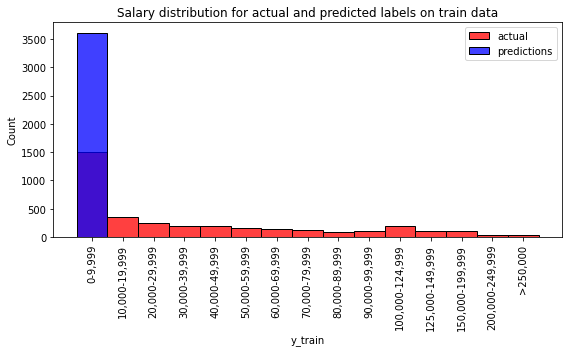

In [ ]:
#PLOT FOR TRAINING SET
plt.figure(figsize=(8,5))
sns.histplot(train_df['y_train'],color='r')
sns.histplot(train_df['y_pred_train'],color='b')
plt.xticks(rotation=90)
plt.title("Salary distribution for actual and predicted labels on train data")
plt.legend(['actual','predictions'])
plt.tight_layout()

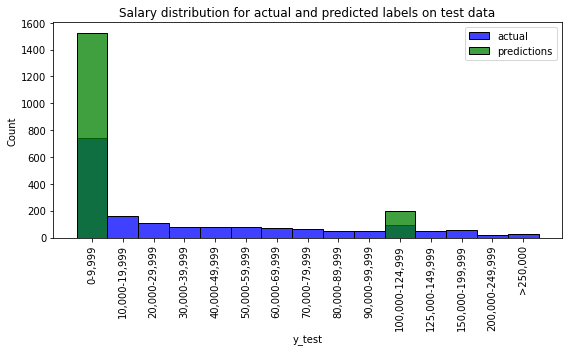

In [ ]:
#PLOT FOR TEST SET
plt.figure(figsize=(8,5))
sns.histplot(test_df['y_test'],color='b')
sns.histplot(test_df['y_pred_test'],color='g')
plt.xticks(rotation=90)
plt.title("Salary distribution for actual and predicted labels on test data")
plt.legend(['actual','predictions'])
plt.tight_layout()